# MVP-Analise Exploratória - PUC-Rio
Tales Gonçalves


# 1. Objetivo
Esta análise visa compreender os dados armazenados no aplicativo Strava que contém informações sobre as minhas atividades de ciclismo, corrida, musculação, entre outras, que são coletadas durante o uso de aparelho celular ou smart watch.

Espera-se encontrar a relação de distancias percorridas entre o tempo, a média de velocidade, o ganho ou perda de elevação com a média de frequencia de batimentos cardíacos para verificar em quais condições exigem mais batimentos.

Para conhecimento de mais detalhes sobre o aplicativo Strava acesse www.strava.com meu perfil https://www.strava.com/athletes/11601498.

## 1.1 Análise
Nesta etapa realizamos a leitura do arquivo json que esta no meu diretório do Github (https://raw.githubusercontent.com/tal-rsg/mvp-analise/main/strava_data.json). Este arquivo foi carregado através de outra etapa que não será abordado nesta análise.

As bibliotecas utilizadas para realizar uma análise explorartória dos dados utilizando a estatístia descritiva para compreender as informações serão carregadas no início do notebook. Cada trecho do código contém comentários para explicar o que cada função executa.
 

In [84]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
import seaborn as sns
from datetime import datetime, timedelta


Com a biblioteca Pandas é feita a leitura dos dados atravez da função read_json() diretamente do diretório onde esta armazenado o arquivo que será analisado.
Após a leitura do arquivo verificamos se o dataframe está de acordo com o Pandas usando a função type().

In [85]:
# lendo arquivo json e visualizando as 10 primeiras linhas
df = pd.read_json('https://raw.githubusercontent.com/tal-rsg/mvp-analise/main/strava_data.json')

# verificando se é um dataframe
type(df)

pandas.core.frame.DataFrame

Com o dataframe validado é verificado o tamanho dele.

In [86]:
# verificando a quantidade de instâncias (linhas) e atributos (colunas) do dataframe
df.shape

(893, 54)

Listando as primerias linhas para uma pré-visualização das informações.

In [87]:
df.head()

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,average_temp,average_cadence
0,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,21662.8,6352,16608,481.5,Ride,Ride,NaN,...,275.5,10882562098,10882562098,garmin_ping_303102490716,False,1,0,False,NaN,NaN
1,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,20281.0,7385,15289,489.1,Ride,Ride,NaN,...,275.5,10869742534,10869742534,garmin_ping_302746503097,False,1,0,False,NaN,NaN
2,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,21828.0,8172,16371,562.4,Ride,Ride,NaN,...,274.8,10840112548,10840112548,garmin_ping_301874679075,False,0,0,False,NaN,NaN
3,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,24342.8,6423,15739,331.8,Ride,Ride,NaN,...,271.6,10808240635,10808240635,garmin_ping_300982622245,False,0,0,False,NaN,NaN
4,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,19236.5,8046,15944,501.2,Ride,Ride,NaN,...,275.2,10742166684,10742166684,garmin_ping_299202202209,False,2,0,False,NaN,NaN


Por conter muitos atributos (colunas), será listado somente o nome destes.

In [88]:
# listando o nome das colunas
df.columns

Index(['resource_state', 'athlete', 'name', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'type', 'sport_type',
       'workout_type', 'id', 'start_date', 'start_date_local', 'timezone',
       'utc_offset', 'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'visibility', 'flagged', 'gear_id', 'start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'average_watts', 'kilojoules',
       'device_watts', 'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'average_temp', 'average_cadence'],
      dtype='object')

In [89]:
# exibindo a quantidade de linhas por colunas
df.count()

resource_state                   893
athlete                          893
name                             893
distance                         893
moving_time                      893
elapsed_time                     893
total_elevation_gain             893
type                             893
sport_type                       893
workout_type                     319
id                               893
start_date                       893
start_date_local                 893
timezone                         893
utc_offset                       893
location_city                     44
location_state                    44
location_country                 893
achievement_count                893
kudos_count                      893
comment_count                    893
athlete_count                    893
photo_count                      893
map                              893
trainer                          893
commute                          893
manual                           893
p

Analisando os atributos e se possuíem valores nulos.

In [90]:
# verificando se há atributos com valores vazios
df.isnull().sum()

resource_state                     0
athlete                            0
name                               0
distance                           0
moving_time                        0
elapsed_time                       0
total_elevation_gain               0
type                               0
sport_type                         0
workout_type                     574
id                                 0
start_date                         0
start_date_local                   0
timezone                           0
utc_offset                         0
location_city                    849
location_state                   849
location_country                   0
achievement_count                  0
kudos_count                        0
comment_count                      0
athlete_count                      0
photo_count                        0
map                                0
trainer                            0
commute                            0
manual                             0
p

Devido a quantidade de atributos, será criado um novo dataframe com a seleção somente dos necessários para esta análise.


In [91]:
# criando um novo dataframe com a seleção de alguns atributos
df_strava = df.loc[:,['name','distance','moving_time','total_elevation_gain','type','sport_type','id','start_date','average_speed','max_speed','average_heartrate','max_heartrate', 'elev_high', 'elev_low','average_temp']]


# validando o dataframe novamente
type(df_strava)


pandas.core.frame.DataFrame

Validado a construção do novo datraframe com a seleção de alguns atribuitos, continuamos a análise listando as primeiras linhas.

In [92]:
# listando as primeiras linhas
df_strava.head()

,name,distance,moving_time,total_elevation_gain,type,sport_type,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
0,Morning Ride,21662.8,6352,481.5,Ride,Ride,10160257723,2023-11-04T11:11:10Z,3.410,13.032,152.8,189.0,599.5,275.5,NaN
1,Morning Ride,20281.0,7385,489.1,Ride,Ride,10148032615,2023-11-02T10:26:44Z,2.746,11.712,147.4,196.0,536.5,275.5,NaN
2,Morning Ride,21828.0,8172,562.4,Ride,Ride,10119802777,2023-10-28T11:03:56Z,2.671,11.045,151.9,194.0,533.1,274.8,NaN
3,Morning Ride,24342.8,6423,331.8,Ride,Ride,10089183560,2023-10-21T11:45:01Z,3.790,10.856,139.6,192.0,410.7,271.6,NaN
4,Morning Ride,19236.5,8046,501.2,Ride,Ride,10025746502,2023-10-12T10:54:38Z,2.391,10.828,146.8,189.0,548.4,275.2,NaN


Agora vamos analisar os tipos de atribuitos no novo dataframe

In [93]:
# listando os tipos  dos atributo
df_strava.dtypes

name                     object
distance                float64
moving_time               int64
total_elevation_gain    float64
type                     object
sport_type               object
id                        int64
start_date               object
average_speed           float64
max_speed               float64
average_heartrate       float64
max_heartrate           float64
elev_high               float64
elev_low                float64
average_temp            float64
dtype: object

Observa-se que os atributos possuiem tipos diferentes e alguns com características de classificadores como a coluna "sport_type" que classifica o tipo de esporte praticado.
Listamos  apenas os atributos contidos na coluna sport_type para checagem.

In [94]:
# listando os valores únicos no atributo
df_strava['sport_type'].unique()

array(['Ride', 'Workout', 'Walk', 'WeightTraining'], dtype=object)

Checando a quantidade de registros por tipo de esporte registrado na coluna sport_type.

In [95]:
# agrupando a coluna e realizando a contagem de registros
totlspt = df_strava.groupby('sport_type')['id'].count().reset_index(name='total_Id')

# imprimindo o resultado
print(totlspt)

       sport_type  total_Id
0            Ride       842
1            Walk         4
2  WeightTraining        39
3         Workout         8


Com o objetivo de centralizar a análise nas atividades de ciclismo, filtramos o dataframe pelo atributo sport_type igual a "Ride".


In [96]:
# novo dataframe com o filtro por tipo de esporte
df_ride = df_strava.loc[df_strava['sport_type'] == "Ride"]

# listando as primeiras linhas
df_ride.head()

,name,distance,moving_time,total_elevation_gain,type,sport_type,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
0,Morning Ride,21662.8,6352,481.5,Ride,Ride,10160257723,2023-11-04T11:11:10Z,3.410,13.032,152.8,189.0,599.5,275.5,NaN
1,Morning Ride,20281.0,7385,489.1,Ride,Ride,10148032615,2023-11-02T10:26:44Z,2.746,11.712,147.4,196.0,536.5,275.5,NaN
2,Morning Ride,21828.0,8172,562.4,Ride,Ride,10119802777,2023-10-28T11:03:56Z,2.671,11.045,151.9,194.0,533.1,274.8,NaN
3,Morning Ride,24342.8,6423,331.8,Ride,Ride,10089183560,2023-10-21T11:45:01Z,3.790,10.856,139.6,192.0,410.7,271.6,NaN
4,Morning Ride,19236.5,8046,501.2,Ride,Ride,10025746502,2023-10-12T10:54:38Z,2.391,10.828,146.8,189.0,548.4,275.2,NaN


Validando se o novo dataframe só contém um tipo de valor na coluna sport_type

In [97]:
df_ride['sport_type'].unique()

array(['Ride'], dtype=object)

In [98]:
# exibindo o sumário estatístico
df_ride.describe()

,distance,moving_time,total_elevation_gain,id,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
count,842.000000,842.000000,842.000000,8.420000e+02,842.000000,842.000000,372.000000,372.000000,842.000000,842.000000,579.000000
mean,30496.508551,5862.775534,483.880760,3.048431e+09,5.185167,12.745982,151.910753,182.282258,431.085748,211.778622,25.236615
std,21250.533788,3729.676260,349.403808,2.384336e+09,2.097894,3.831978,8.127086,9.646496,214.156554,123.486117,4.736771
min,0.000000,0.000000,0.000000,4.056882e+08,0.000000,0.000000,109.200000,141.000000,0.000000,-278.000000,0.000000
25%,17623.800000,3989.750000,277.000000,1.357570e+09,3.989000,11.200000,147.275000,176.000000,377.800000,186.450000,23.000000
50%,27538.000000,5383.500000,444.350000,1.758372e+09,5.261500,13.100000,151.950000,183.000000,451.400000,259.300000,25.000000
75%,39090.925000,7908.250000,647.750000,4.526791e+09,6.086000,14.500000,157.275000,188.000000,539.875000,277.000000,28.000000
max,200526.000000,36664.000000,2764.000000,1.016026e+10,33.640000,31.700000,174.500000,232.000000,1615.600000,985.500000,40.000000


## 1.2 Pré-processamento
Neste ponto iremos tratar algumas informações e verificar se as informações respondem as perguntas iniciais.

Analisando se há valores nulos no dataframe

<AxesSubplot:>

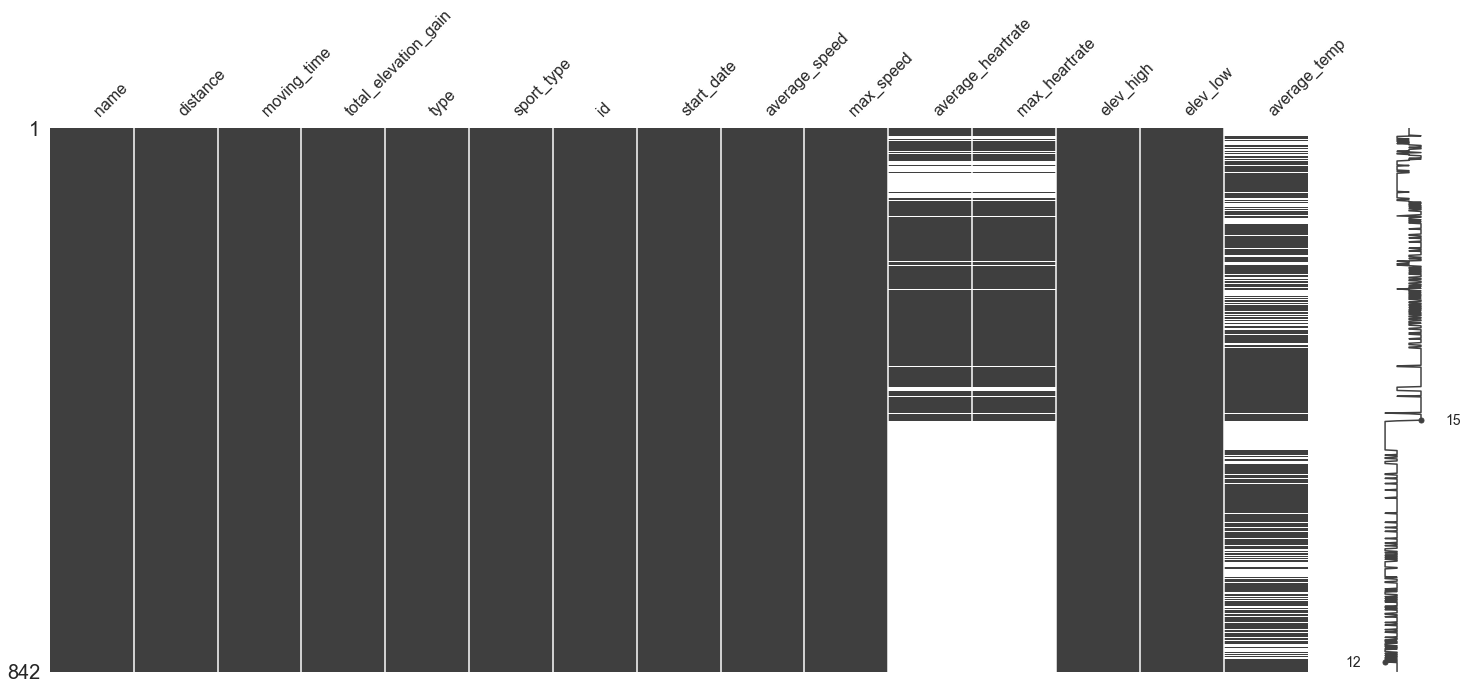

In [99]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_ride)

Verificando a quantidade de valores nulos

In [100]:
df_ride.isnull().sum()

name                      0
distance                  0
moving_time               0
total_elevation_gain      0
type                      0
sport_type                0
id                        0
start_date                0
average_speed             0
max_speed                 0
average_heartrate       470
max_heartrate           470
elev_high                 0
elev_low                  0
average_temp            263
dtype: int64

Indenfica-se que os atributos average_heartrate, max_heartrate e average_temp possuiem uma quantidade consideravel de valores nulos, sendo assim será feito o tratamento dos valores para os atributos average_heartrate e max_heartrate considerando uma amostragem das informações diferente de nulos e sua relação com a distancia percorrida para um melhor agrupamento de conjuntos similares.

In [101]:
# criando as condições para classificação do atributo distance
cond_baixa = df_ride['distance'] < 15000
cond_media = (df_ride['distance'] >= 15000) & (df_ride['distance'] < 40000)
cond_alta = df_ride['distance'] >= 40000

# o valores para classificar
labels = ['Baixa', 'Media', 'Alta']

# criando o novo atributo 'grp_distance' com a condição criada acima
df_ride['grp_distance'] = np.select([cond_baixa, cond_media, cond_alta], labels, default='Unknown')

# visualizando as colunas do dataframe com a criação do novo atributo
df_ride.columns

Index(['name', 'distance', 'moving_time', 'total_elevation_gain', 'type',
       'sport_type', 'id', 'start_date', 'average_speed', 'max_speed',
       'average_heartrate', 'max_heartrate', 'elev_high', 'elev_low',
       'average_temp', 'grp_distance'],
      dtype='object')

In [102]:
# verificando se tem valor desconhecido
df_ride.loc[df_ride['grp_distance'] == "Unknown"]

,name,distance,moving_time,total_elevation_gain,type,sport_type,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp,grp_distance


In [103]:
# criando um dataframe para agrupar os atributos por grp_distance e a média
df_grp_media = df_ride.groupby('grp_distance').mean()

# visualizando o dataframe
df_grp_media

,distance,moving_time,total_elevation_gain,id,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
grp_distance,,,,,,,,,,,
Alta,58722.816418,10166.940299,769.946269,2.300592e+09,5.937512,15.374493,153.245455,183.131313,462.629353,207.882587,26.626016
Baixa,6287.404061,1794.538071,176.867005,1.724498e+09,4.224980,8.633802,151.289474,181.263158,316.908629,142.277665,24.325967
Media,28459.809685,5719.319820,490.598198,3.974400e+09,5.270608,13.380597,151.437008,182.027559,467.465541,244.379505,25.214545


In [104]:
# Replace NaN values in column 'A' with 99 where column 'B' is not NaN
#condition = ~df['B'].isna()
#df['A'] = np.where(condition, df['A'].fillna(99), df['A'])

Tratando os valores nulos para as colunas average_heartrate, max_reatrate e average_tmp. 

<AxesSubplot:>

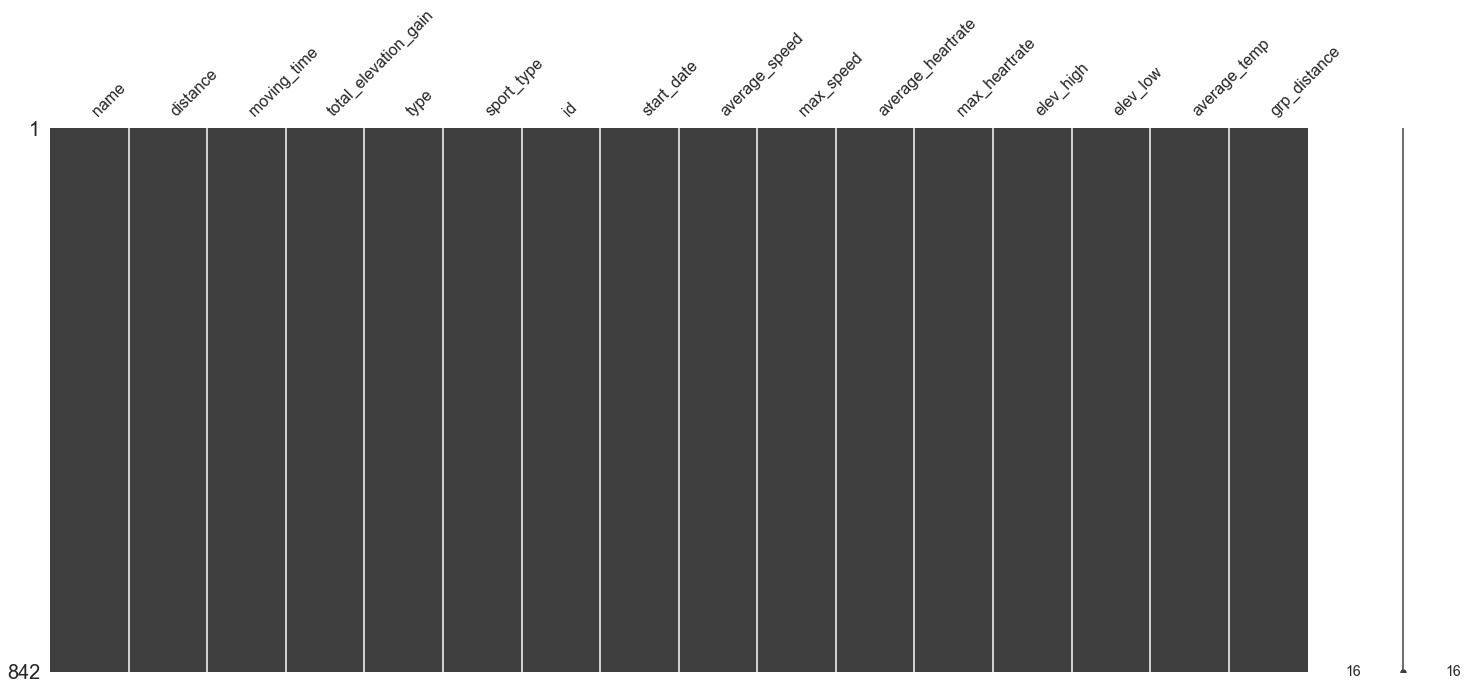

In [105]:
# substituindo os NaN de 'Glucose', 'BloodPressure' e 'BMI' pela mediana da coluna
df_ride['average_heartrate'].fillna(df_ride['average_heartrate'].median(), inplace=True)
df_ride['max_heartrate'].fillna(df_ride['max_heartrate'].median(), inplace=True)
df_ride['average_temp'].fillna(df_ride['average_temp'].median(), inplace=True)

# visualizando se ha valores nulos
ms.matrix(df_ride)

Com o objetivo de verificar a relação do ritmo cardiáco com o esforço desenvolvido e tentar identifcar a relação entre o tempo de atividades, a distancia percorrida e o ganho de elevação obtido para prever a hipotse de riscos a saúde.

Text(0.5, 1.0, 'Boxplot Média Batimentos Cardiacos')

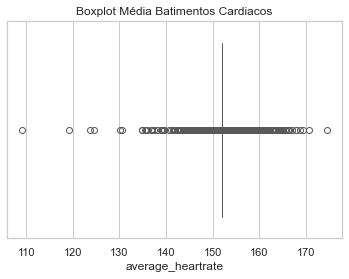

In [115]:
# configurando o estilo do gráfico
sns.set(style="whitegrid")

# Create box plots for all columns
#for column in df_ride.columns:
#    plt.figure(figsize=(4, 2))
#    sns.boxplot(x=df_ride[column], palette="Set2")
#    plt.title(f'Box Plot for {column}')
#plt.show()


sns.boxplot(x=df_ride['average_heartrate'], palette="Set2")
plt.title('Boxplot Média Batimentos Cardiacos')

In [107]:
df_ride['start_date'].max()

'2023-11-04T11:11:10Z'

In [112]:
# convertendo o campo start_date para o tipo data
df_ride['start_date'] = pd.to_datetime(df['start_date'])

# funcao para calcular a idade no periodo da atividade
def calculate_age(birthdate):
    current_date = datetime(1980,11,18)
    age = birthdate.year - current_date.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age

# criando a nova coluna com o calculo da idade
df_ride['Age'] = df_ride['start_date'].apply(calculate_age)

# função para calcular o Frequencia Cardiaca Maxima (FC max)
def calc_fcmax(fcmax):
    fc_max = 220 - fcmax
    return fc_max

# criando a nova coluna com o calculo do FC Max
df_ride['FCmax'] = df_ride['Age'].apply(calc_fcmax)

# Display the DataFrame with the calculated age
df_ride.head()


,name,distance,moving_time,total_elevation_gain,type,sport_type,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp,grp_distance,Age,FCmax
0,Morning Ride,21662.8,6352,481.5,Ride,Ride,10160257723,2023-11-04 11:11:10+00:00,3.410,13.032,152.8,189.0,599.5,275.5,25.0,Media,43,177
1,Morning Ride,20281.0,7385,489.1,Ride,Ride,10148032615,2023-11-02 10:26:44+00:00,2.746,11.712,147.4,196.0,536.5,275.5,25.0,Media,43,177
2,Morning Ride,21828.0,8172,562.4,Ride,Ride,10119802777,2023-10-28 11:03:56+00:00,2.671,11.045,151.9,194.0,533.1,274.8,25.0,Media,43,177
3,Morning Ride,24342.8,6423,331.8,Ride,Ride,10089183560,2023-10-21 11:45:01+00:00,3.790,10.856,139.6,192.0,410.7,271.6,25.0,Media,43,177
4,Morning Ride,19236.5,8046,501.2,Ride,Ride,10025746502,2023-10-12 10:54:38+00:00,2.391,10.828,146.8,189.0,548.4,275.2,25.0,Media,43,177


In [114]:
df_ride.loc[df_ride['distance'] <= 1]

,name,distance,moving_time,total_elevation_gain,type,sport_type,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp,grp_distance,Age,FCmax
551,Morning Ride,0.0,0,0.0,Ride,Ride,1357584850,2017-05-26 09:41:06+00:00,0.000,0.0,151.95,183.0,0.4,-28.0,0.0,Baixa,37,183
558,Evening Ride,0.0,1,0.0,Ride,Ride,1357584610,2017-05-15 23:02:31+00:00,0.000,0.0,151.95,183.0,74.0,74.0,25.0,Baixa,37,183
760,Morning Ride,0.1,3,0.0,Ride,Ride,1357572203,2016-07-24 12:34:31+00:00,0.033,0.0,151.95,183.0,3.0,3.0,0.0,Baixa,36,184
800,Evening Ride,0.0,5,0.0,Ride,Ride,1357569801,2016-04-24 22:07:48+00:00,0.000,0.0,151.95,183.0,39.6,39.4,0.0,Baixa,36,184
889,Evening Ride,0.0,1,0.0,Ride,Ride,1357562666,2015-06-14 22:17:36+00:00,0.000,0.0,151.95,183.0,121.2,121.2,25.0,Baixa,35,185


In [ ]:
df_ride = df_ride[df_ride['distance'] > 10000]

df_ride.describe()

Text(0.5, 1.0, 'Distância x Media de Batimentos Cardíacos')

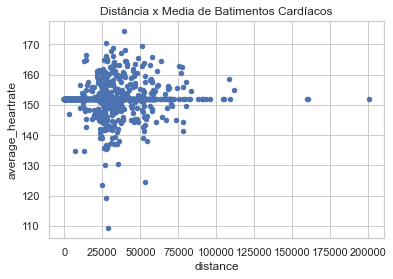

In [117]:
df_scatter_ride = df_ride[['distance', 'average_heartrate']]

colors = {'distance': 'red', 'average_heartrate': 'blue'}

df_scatter_ride.plot.scatter(x='distance',y='average_heartrate')

plt.title('Distância x Media de Batimentos Cardíacos')


Text(0.5, 1.0, 'Tempo Movimento x Media de Batimentos Cardíacos')

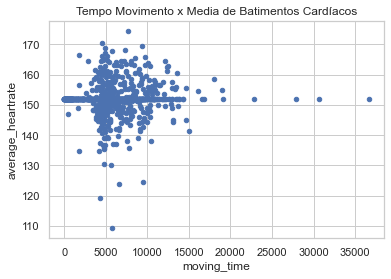

In [116]:
df_scatter_time = df_ride[['moving_time', 'average_heartrate']]

df_scatter_time['move_log'] = np.log10(df_scatter_time['moving_time'])

colors = {'move_log': 'red', 'average_heartrate': 'blue'}

df_scatter_time.plot.scatter(x='moving_time',y='average_heartrate')

plt.title('Tempo Movimento x Media de Batimentos Cardíacos')


Text(0.5, 1.0, 'Elevação x Media de Batimentos Cardíacos')

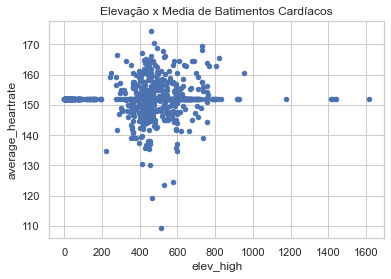

In [118]:
df_scatter_elev = df_ride[['elev_high', 'average_heartrate']]

df_scatter_elev.plot.scatter(x='elev_high',y='average_heartrate')

plt.title('Elevação x Media de Batimentos Cardíacos')

In [ ]:
# visualizando os tipos de atividades
df_ride['sport_type'].unique()

In [ ]:
# maior distancia
df_ride['distance'].max()

In [ ]:
# menor distancia
df_ride['distance'].min()

In [ ]:
# sumarizando a distancia por ano
df_ride['year'] = pd.to_datetime(df_ride['start_date']).dt.year  # Extract the year
result = df_ride.groupby('year')['distance'].sum().reset_index(name='totalKm')

# grafico distancia ano

# plotando o histograma
plt.barh(result['year'], result['totalKm'])

# incluindo título do gráfico e legenda
plt.title('Total de KM por Ano')
plt.ylabel('Total KM')
plt.xlabel('Ano');


In [ ]:
# pair plot 2 com Seaborn
sns.pairplot(df_ride, hue = "average_heartrate");

In [ ]:
# gráfico de correlação com Seaborn
sns.heatmap(df_ride.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [ ]:
# boxplot com Seaborn
sns.boxplot(data = df_ride);